# STOCK PRICE AND PERFORMANCE PREDICTION

### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from pandas_datareader import data
import matplotlib.pyplot as plt
plt.style.use('bmh')

### Input the securities

In [2]:
n = int(input('Enter the number of securities: '))
tickers = []
for i in range(n):
    tickers.append(input())

Enter the number of securities: 5
AAPL
MSFT
TSLA
NVDA
NKE


### Combining adjusted closing prices since 2011 into one dataframe 'sec_data' (current date = 30/10/2020)

In [3]:
sec_data = pd.DataFrame()

for t in tickers:
    x = data.DataReader(t, data_source='yahoo', start='2011-1-1')
    print('\n'+t+':')
    print(x.head())
    sec_data[t] = x['Adj Close']



AAPL:
                 High        Low       Open      Close       Volume  Adj Close
Date                                                                          
2010-12-31  11.552857  11.475357  11.533929  11.520000  193508000.0   9.954883
2011-01-03  11.795000  11.601429  11.630000  11.770357  445138400.0  10.171227
2011-01-04  11.875000  11.719643  11.872857  11.831786  309080800.0  10.224311
2011-01-05  11.940714  11.767858  11.769643  11.928572  255519600.0  10.307948
2011-01-06  11.973214  11.889286  11.954286  11.918928  300428800.0  10.299613

MSFT:
             High        Low       Open  Close      Volume  Adj Close
Date                                                                 
2010-12-31  27.92  27.629999  27.799999  27.91  24752000.0  22.248495
2011-01-03  28.18  27.920000  28.049999  27.98  53443800.0  22.304296
2011-01-04  28.17  27.850000  27.940001  28.09  54405600.0  22.391983
2011-01-05  28.01  27.770000  27.900000  28.00  58998700.0  22.320236
2011-01-06  2

In [4]:
sec_data

,AAPL,MSFT,TSLA,NVDA,NKE
2010-12-31,9.954883,22.248495,5.326000,14.163141,16.570024
2011-01-03,10.171227,22.304296,5.324000,14.549408,16.699995
2011-01-04,10.224311,22.391983,5.334000,14.503422,16.288754
2011-01-05,10.307948,22.320236,5.366000,15.616243,16.395445
2011-01-06,10.299613,22.973900,5.576000,17.777500,16.248020
...,...,...,...,...,...
2020-10-26,115.050003,210.080002,420.279999,525.650024,128.369995
2020-10-27,116.599998,213.250000,424.679993,535.869995,127.989998
2020-10-28,111.199997,202.679993,406.019989,505.079987,122.080002
2020-10-29,115.320000,204.720001,410.829987,520.960022,122.860001


---

## STOCK PERFORMANCE

### Computing daily log returns 'sec_returns'

In [5]:
sec_returns = np.log(sec_data / sec_data.shift(1))
sec_returns.tail()

,AAPL,MSFT,TSLA,NVDA,NKE
2020-10-26,0.000087,-0.028854,-0.000832,-0.033596,-0.012541
2020-10-27,0.013382,0.014977,0.010415,0.019256,-0.002965
2020-10-28,-0.047419,-0.050837,-0.044934,-0.059175,-0.047276
2020-10-29,0.036381,0.010015,0.011777,0.030956,0.006369
2020-10-30,-0.057648,-0.011051,-0.057071,-0.038349,-0.022887


### Plotting the daily prices of all securities

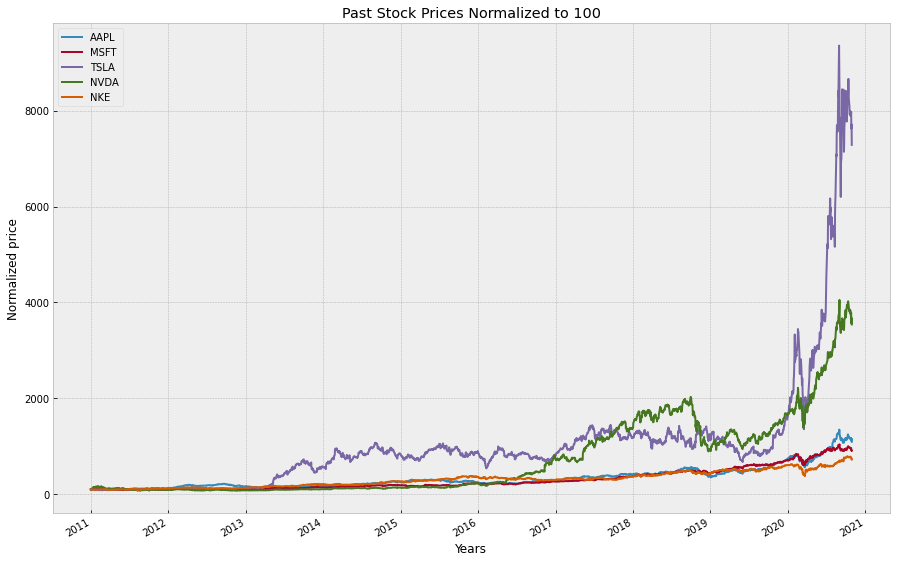

In [6]:
(sec_data/sec_data.iloc[0]*100).plot(figsize=(15,10))
plt.title('Past Stock Prices Normalized to 100')
plt.xlabel('Years')
plt.ylabel('Normalized price')
plt.show()

### Computing average annual returns and risks, and their ratios

In [7]:
avg_ret=[]
avg_risk=[]
ret_risk_ratio=[]
for t in tickers:
    mn=(sec_returns[t].mean()*250)
    sd=(sec_returns[t].std()*250**0.5)
    avg_ret.append(mn)
    avg_risk.append(sd)
    ret_risk_ratio.append(mn/sd)

dict = {'Average Annual Return':avg_ret,'Average Annual Risk':avg_risk,'Return-to-Risk Ratio':ret_risk_ratio}
mean_returns = pd.DataFrame(dict,index=tickers)
mean_returns

,Average Annual Return,Average Annual Risk,Return-to-Risk Ratio
AAPL,0.241616,0.283882,0.851114
MSFT,0.223062,0.256446,0.869821
TSLA,0.433183,0.547222,0.791603
NVDA,0.360271,0.420000,0.857788
NKE,0.200057,0.260493,0.767993


### The security with highest ratio

In [8]:
max_ret_risk_ratio = mean_returns['Return-to-Risk Ratio'].max()

print('Details of the security with the highest return-to-risk ratio:')
mean_returns.loc[mean_returns['Return-to-Risk Ratio']==max_ret_risk_ratio]

Details of the security with the highest return-to-risk ratio:


,Average Annual Return,Average Annual Risk,Return-to-Risk Ratio
MSFT,0.223062,0.256446,0.869821


### All possible portfolios 

In [9]:
from itertools import combinations 

portfolios = []

for r in range(2, n+1):
    combinations_object = combinations(tickers, r)
    portfolios += combinations_object

portfolios

[('AAPL', 'MSFT'),
 ('AAPL', 'TSLA'),
 ('AAPL', 'NVDA'),
 ('AAPL', 'NKE'),
 ('MSFT', 'TSLA'),
 ('MSFT', 'NVDA'),
 ('MSFT', 'NKE'),
 ('TSLA', 'NVDA'),
 ('TSLA', 'NKE'),
 ('NVDA', 'NKE'),
 ('AAPL', 'MSFT', 'TSLA'),
 ('AAPL', 'MSFT', 'NVDA'),
 ('AAPL', 'MSFT', 'NKE'),
 ('AAPL', 'TSLA', 'NVDA'),
 ('AAPL', 'TSLA', 'NKE'),
 ('AAPL', 'NVDA', 'NKE'),
 ('MSFT', 'TSLA', 'NVDA'),
 ('MSFT', 'TSLA', 'NKE'),
 ('MSFT', 'NVDA', 'NKE'),
 ('TSLA', 'NVDA', 'NKE'),
 ('AAPL', 'MSFT', 'TSLA', 'NVDA'),
 ('AAPL', 'MSFT', 'TSLA', 'NKE'),
 ('AAPL', 'MSFT', 'NVDA', 'NKE'),
 ('AAPL', 'TSLA', 'NVDA', 'NKE'),
 ('MSFT', 'TSLA', 'NVDA', 'NKE'),
 ('AAPL', 'MSFT', 'TSLA', 'NVDA', 'NKE')]

### 1000 iterations of randomized weight distribution and plotting return vs risk for each portfolio

c:\users\abath\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


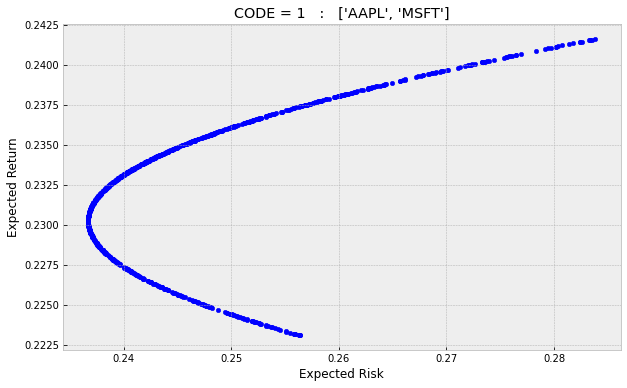

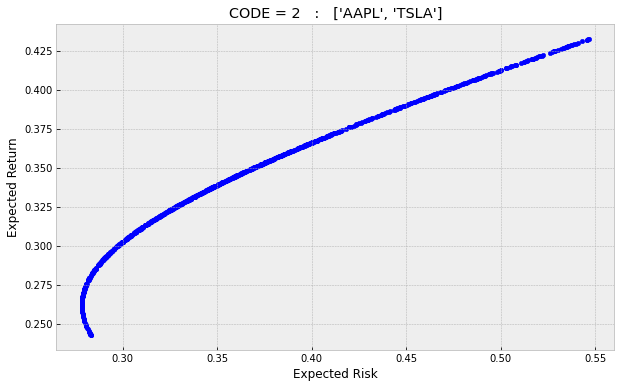

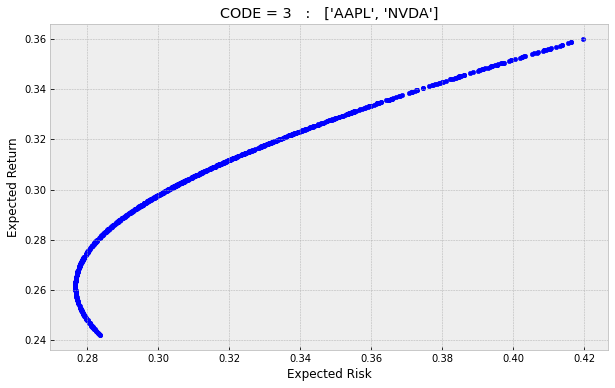

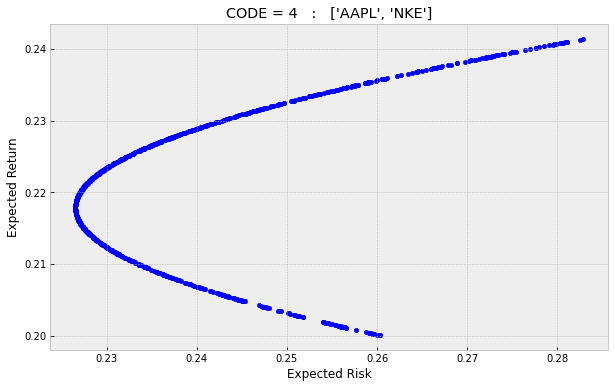

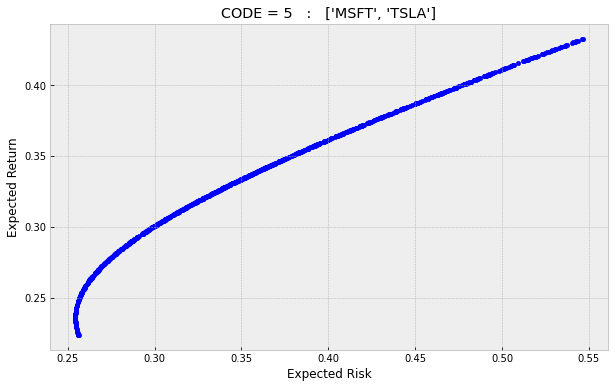

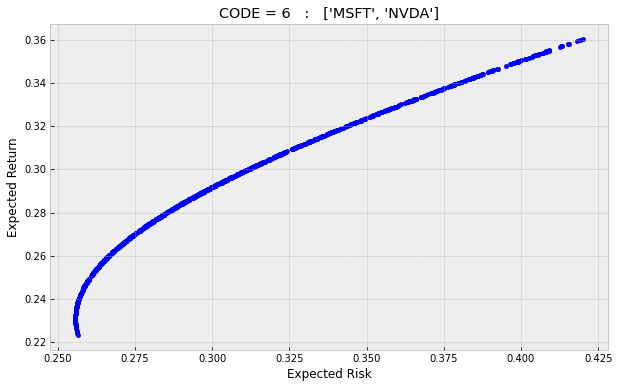

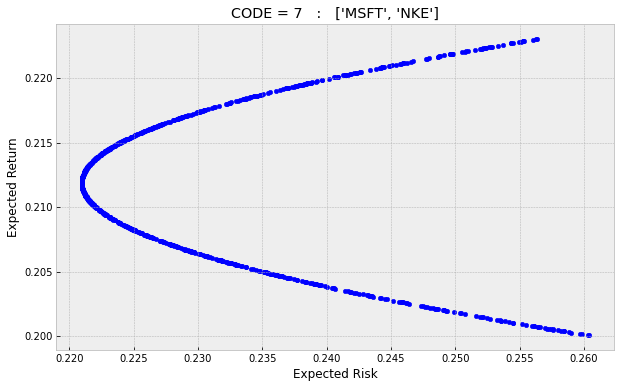

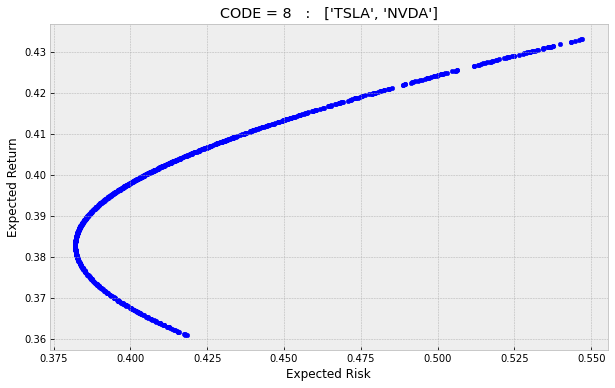

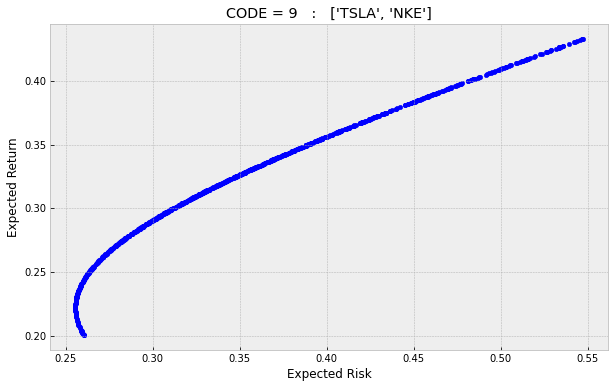

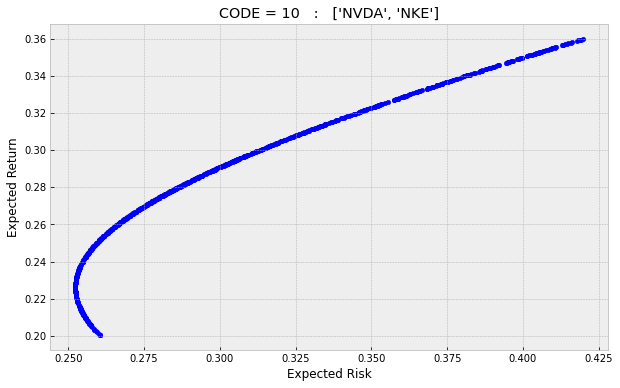

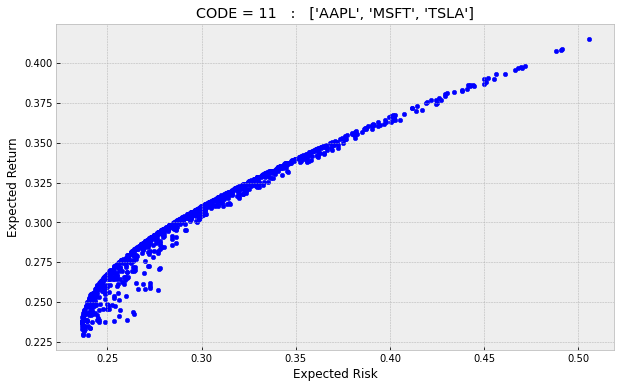

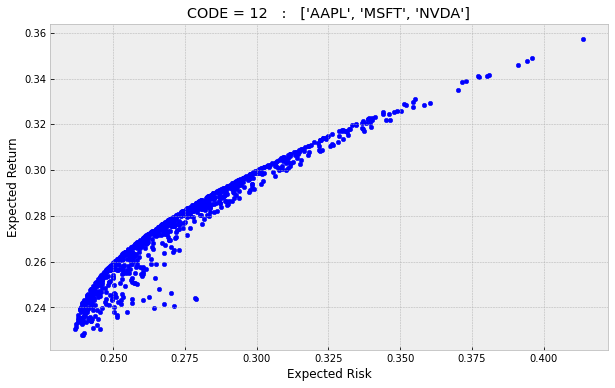

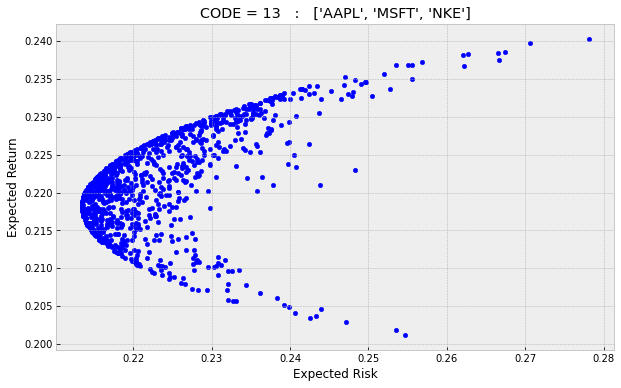

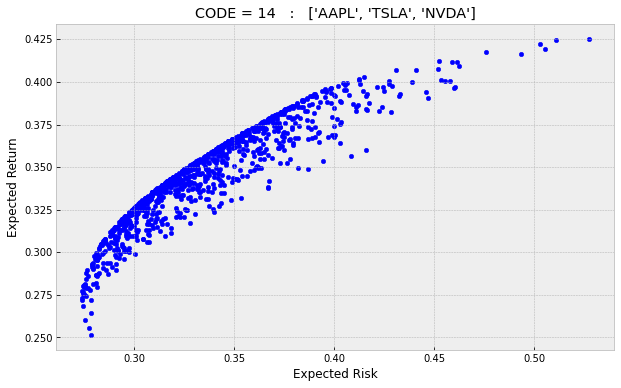

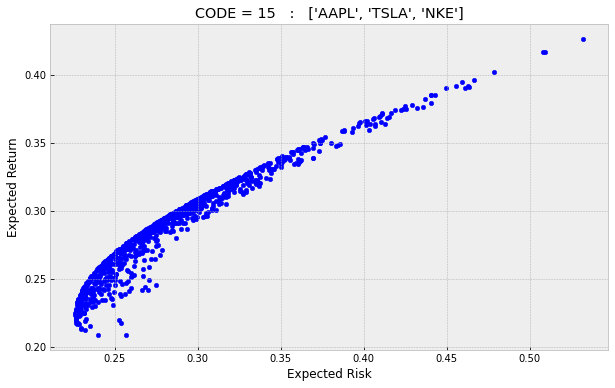

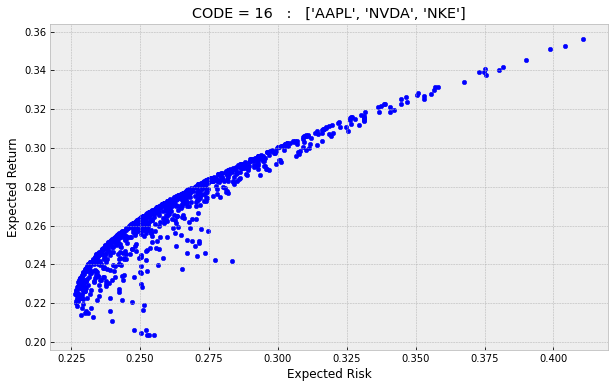

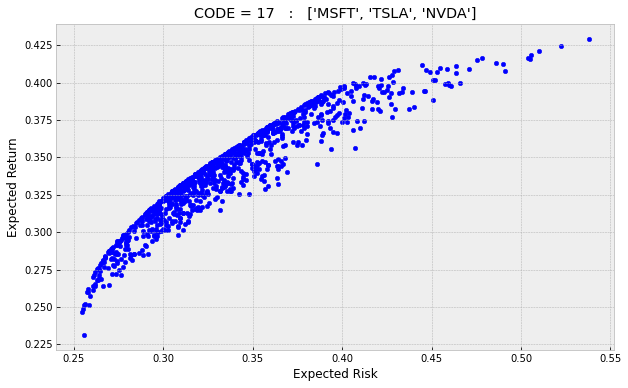

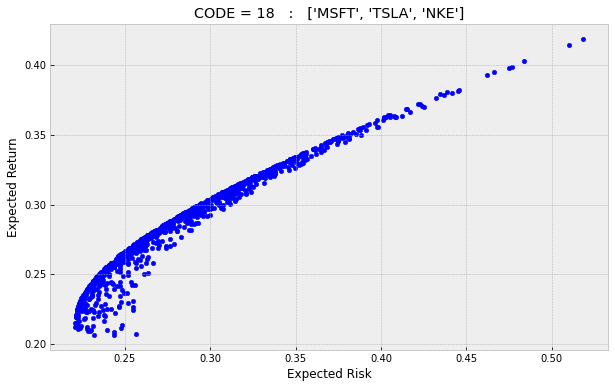

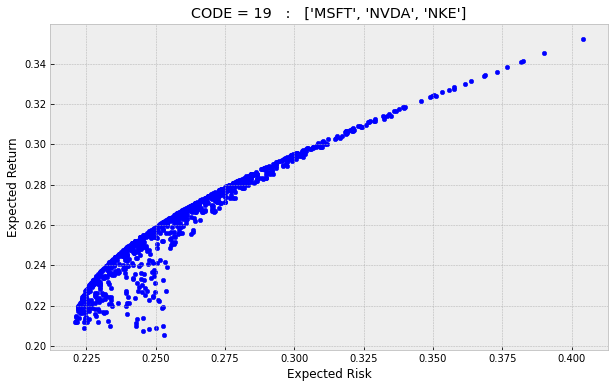

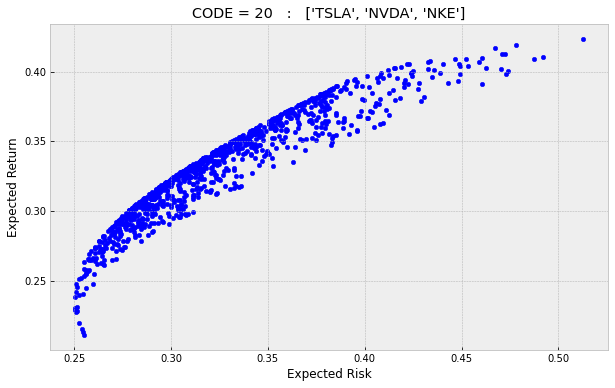

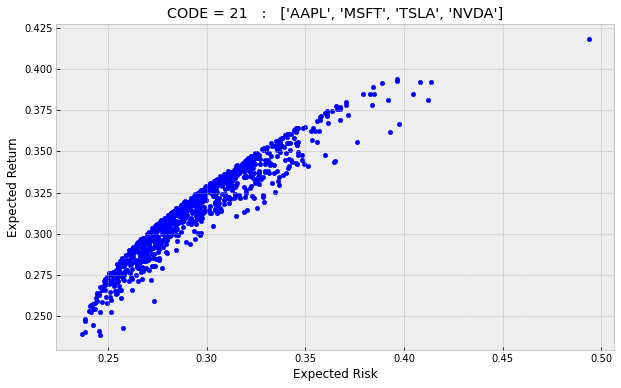

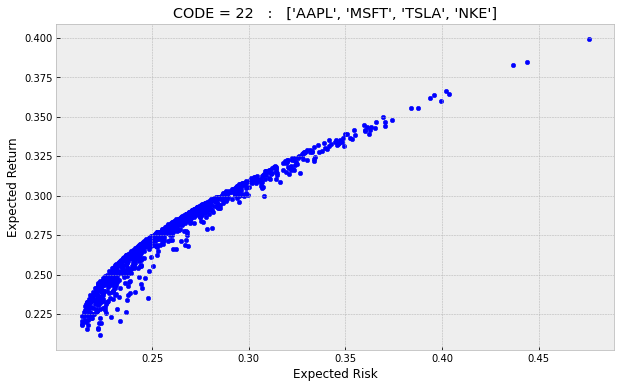

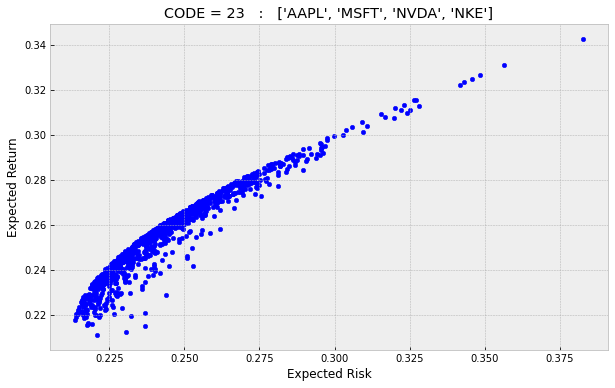

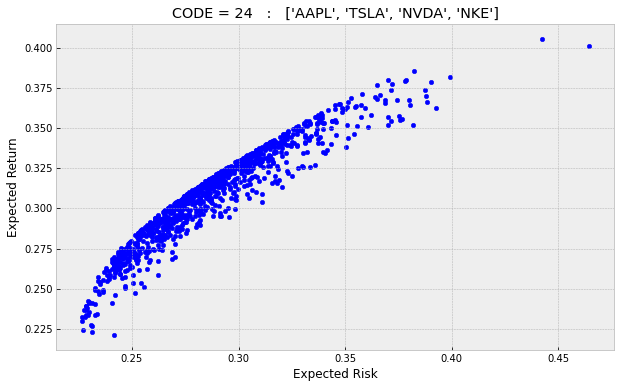

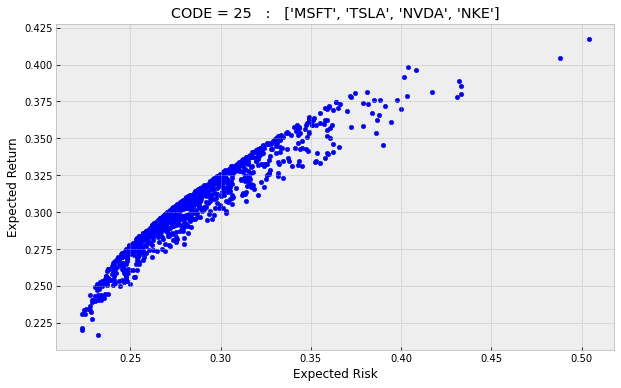

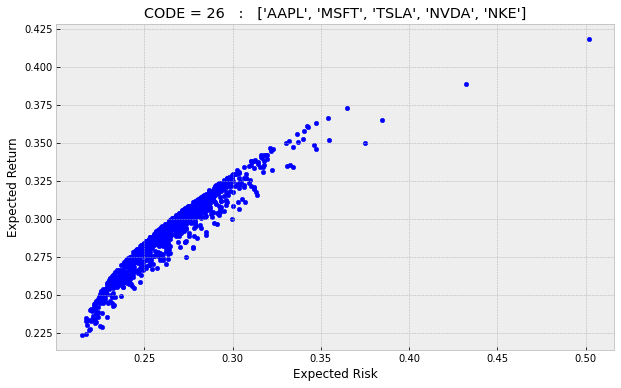

In [10]:
port_returns=[[]]
port_risks=[[]]
port_weights=[[]]
mean_ret_t = mean_returns.transpose()
i=0
max_rrr=0
max_rrr_index=-1


for p in portfolios:
    port=list(p)
    port_dat=mean_ret_t[port]
    l=len(port)
    ann_ret=port_dat.loc['Average Annual Return',:]
    ann_risk=port_dat.loc['Average Annual Risk',:]
    i+=1
    reti=[]
    riski=[]
    wts=[]
    for x in range (1000):
        weights = np.random.random(l)
        weights /= np.sum(weights)
        ret=np.dot(ann_ret,weights)
        ris=np.sqrt(np.dot(weights.T,np.dot(sec_returns[port].cov() * 250, weights)))
        reti.append(ret)
        riski.append(ris)
        wts.append(weights)
        if ret/ris > max_rrr:
            max_rrr = ret/ris
            max_rrr_index = i
            max_rrr_weights = weights
            max_rrr_ret=ret
    port_returns.append(reti)
    port_risks.append(riski)
    port_weights.append(wts)
    
    
    port_df = pd.DataFrame({'Return': reti, 'Risk': riski})
    port_df.plot(x='Risk', y='Return', kind='scatter', figsize=(10, 6));
    plt.xlabel('Expected Risk')
    plt.ylabel('Expected Return')
    plt.title('CODE = '+str(i)+'   :   '+str(port))

### Portfolio with highest RRR 

In [11]:
print('The best choice for a portfolio:')
print(portfolios[max_rrr_index-1])
print('\nThe best ratios of investment in each security (in order):')
print(max_rrr_weights)
print('\nThe estimated maximum annual return-to-risk ratio for this portfolio with the suggested weights:')
print(round(max_rrr, 5))
print('\nReturn:\t',str(round(np.exp(max_rrr_ret)*100-100,3)),'%\t','Risk:\t',str(round(max_rrr_ret/max_rrr,5)))

The best choice for a portfolio:
('AAPL', 'MSFT', 'TSLA', 'NVDA', 'NKE')

The best ratios of investment in each security (in order):
[0.21053441 0.20858937 0.16478011 0.17684972 0.23924639]

The estimated maximum annual return-to-risk ratio for this portfolio with the suggested weights:
1.14157

Return:	 32.36 %	 Risk:	 0.24559


### Highest return for a given risk

In [12]:
code=int(input('Enter the code for your preferred portfolio (refer the plots above): '))
max_risk = float(input('Enter the maximum risk you are willing to take (refer the plots above): '))

max_return = np.array(port_returns[code])[tuple(np.where(np.array(port_risks[code])<=max_risk))].max()
max_return_index = port_returns[code].index(max_return)
print('\nEstimated maximum annual profit with the risk:')
print(str(round(np.exp(max_return)*100-100,3)),'%')
print('\nRespective weights for the securities:')
print(port_weights[code][max_return_index])

Enter the code for your preferred portfolio (refer the plots above): 26
Enter the maximum risk you are willing to take (refer the plots above): 0.3

Estimated maximum annual profit with the risk:
38.971 %

Respective weights for the securities:
[0.14272592 0.16392723 0.29019217 0.32261191 0.08054277]


---

## STOCK PRICE PREDICTION

### Dataframe with past and shifted past prices

In [13]:
pred_sec=input('Enter the ticker for the security that you want to predict the prices of: ')
days = int(input('Enter the number of future days for prediction: '))
pred_prices = sec_data[[pred_sec]]
pred_prices.columns = ['Past Prices']
pred_prices['Shifted Prices'] = pred_prices[['Past Prices']].shift(-days)
pred_prices

Enter the ticker for the security that you want to predict the prices of: MSFT
Enter the number of future days for prediction: 250


<ipython-input-13-af1b2191b7ee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_prices['Shifted Prices'] = pred_prices[['Past Prices']].shift(-days)


,Past Prices,Shifted Prices
2010-12-31,22.248495,21.129261
2011-01-03,22.304296,21.292927
2011-01-04,22.391983,21.243826
2011-01-05,22.320236,21.906679
2011-01-06,22.973900,22.422224
...,...,...
2020-10-26,210.080002,NaN
2020-10-27,213.250000,NaN
2020-10-28,202.679993,NaN
2020-10-29,204.720001,NaN


### Preparing feature array

In [14]:
X = np.array(pred_prices.drop(['Shifted Prices'],1))[:-days]
X

array([[ 22.2484951 ],
       [ 22.30429649],
       [ 22.39198303],
       ...,
       [141.75616455],
       [142.10223389],
       [142.92289734]])

### Preparing target array

In [15]:
y = np.array(pred_prices['Shifted Prices'])[:-days]
y

array([ 21.12926102,  21.29292679,  21.24382591, ..., 202.67999268,
       204.72000122, 202.47000122])

### Splitting into training and testing datasets, computing confidence intervals for different methods of regression

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
lin_reg_r2 = lin_reg.score(x_test, y_test)
print("Linear regression confidence interval:\t\t", lin_reg_r2)

dec_tree_reg = DecisionTreeRegressor()
dec_tree_reg.fit(x_train, y_train)
dec_tree_r2 = dec_tree_reg.score(x_test, y_test)
print("Decision tree regressor confidence interval:\t", dec_tree_r2)

svr = SVR() 
svr.fit(x_train, y_train)
svr_r2 = svr.score(x_test, y_test)
print("Support vector regression confidence interval:\t", svr_r2)

Linear regression confidence interval:		 0.973499568226818
Decision tree regressor confidence interval:	 0.971609482880668
Support vector regression confidence interval:	 0.9583107657033514


### Past prices in the last 'days' days

In [29]:
last_days_prices = np.array(pred_prices.drop(['Shifted Prices'],1))[-days:]
last_days_prices

array([[142.83392334],
       [142.43840027],
       [142.63613892],
       [144.3170166 ],
       [144.46533203],
       [145.41452026],
       [145.65182495],
       [146.39337158],
       [148.28189087],
       [148.64772034],
       [148.69714355],
       [148.43919373],
       [148.30029297],
       [148.40943909],
       [150.03649902],
       [150.83018494],
       [151.11790466],
       [150.18531799],
       [148.36976624],
       [148.13165283],
       [148.66738892],
       [148.74674988],
       [150.55238342],
       [150.16548157],
       [149.93730164],
       [150.5027771 ],
       [152.03063965],
       [153.31045532],
       [154.30255127],
       [153.4691925 ],
       [153.1517334 ],
       [154.4811554 ],
       [156.16773987],
       [156.16773987],
       [156.13795471],
       [157.41778564],
       [157.70550537],
       [156.34629822],
       [156.45542908],
       [159.35238647],
       [157.36817932],
       [157.77494812],
       [156.33639526],
       [158

### Predicting future prices for 'days' days

In [30]:
predicted_prices = lin_reg.predict(last_days_prices)
predicted_prices

array([205.48924034, 204.89497418, 205.19207287, 207.71756075,
       207.94040196, 209.36653987, 209.7230858 , 210.83724601,
       213.67471159, 214.22436365, 214.29862113, 213.91105624,
       213.7023604 , 213.86635044, 216.31097814, 217.50347667,
       217.93577028, 216.53457592, 213.80674271, 213.44898169,
       214.25391533, 214.37315372, 217.08608499, 216.50477205,
       216.16193589, 217.0115524 , 219.30713784, 221.23003741,
       222.72064337, 221.46853712, 220.99156063, 222.98899279,
       225.52305501, 225.52305501, 225.47830336, 227.40122586,
       227.83351947, 225.79133566, 225.95530277, 230.30792811,
       227.32669327, 227.93785592, 225.77645665, 229.5178964 ,
       232.49913124, 231.38118824, 234.27298856, 232.55878483,
       234.1239463 , 238.58090809, 239.96720052, 239.07280943,
       237.88031091, 239.40074366, 236.89650823, 232.78235967,
       237.52259574, 241.36834903, 248.43392856, 244.63283522,
       250.81894853, 259.37511109, 259.04717686, 264.60

### Plotting the predicted prices

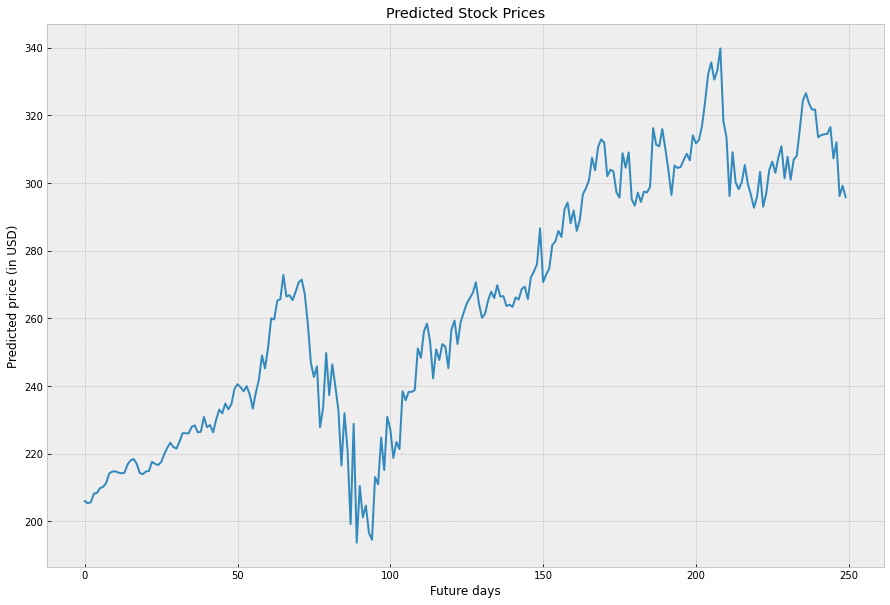

In [21]:
plt.figure(figsize=(15,10))
plt.plot(predicted_prices)
plt.xlabel('Future days')
plt.ylabel('Predicted price (in USD)')
plt.title('Predicted Stock Prices')
plt.show()